In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],inplace=True,axis=1)

In [19]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [20]:
df['Age'].isnull().sum()

0

In [12]:
df['Sex']=df['Sex'].map({'male':1,'female':2})
df['Sex'].head()

0    1
1    2
2    2
3    2
4    1
Name: Sex, dtype: int64

In [21]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [22]:
X

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,2,19.000000,30.0000
888,3,2,29.699118,23.4500
889,1,1,26.000000,30.0000


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [33]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9789325842696629
0.7486033519553073


[Text(0.4937905704273897, 0.9782608695652174, 'x[1] <= 1.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Not Survived'),
 Text(0.18450209673713236, 0.9347826086956522, 'x[2] <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]\nclass = Not Survived'),
 Text(0.03860294117647059, 0.8913043478260869, 'x[0] <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7, 15]\nclass = Survived'),
 Text(0.03125, 0.8478260869565217, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = Survived'),
 Text(0.04595588235294118, 0.8478260869565217, 'x[3] <= 20.825\ngini = 0.497\nsamples = 13\nvalue = [7, 6]\nclass = Not Survived'),
 Text(0.03860294117647059, 0.8043478260869565, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Survived'),
 Text(0.05330882352941176, 0.8043478260869565, 'x[2] <= 2.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Not Survived'),
 Text(0.04595588235294118, 0.7608695652173914, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Not Survived'),
 Text(0.06066176470588235, 0.

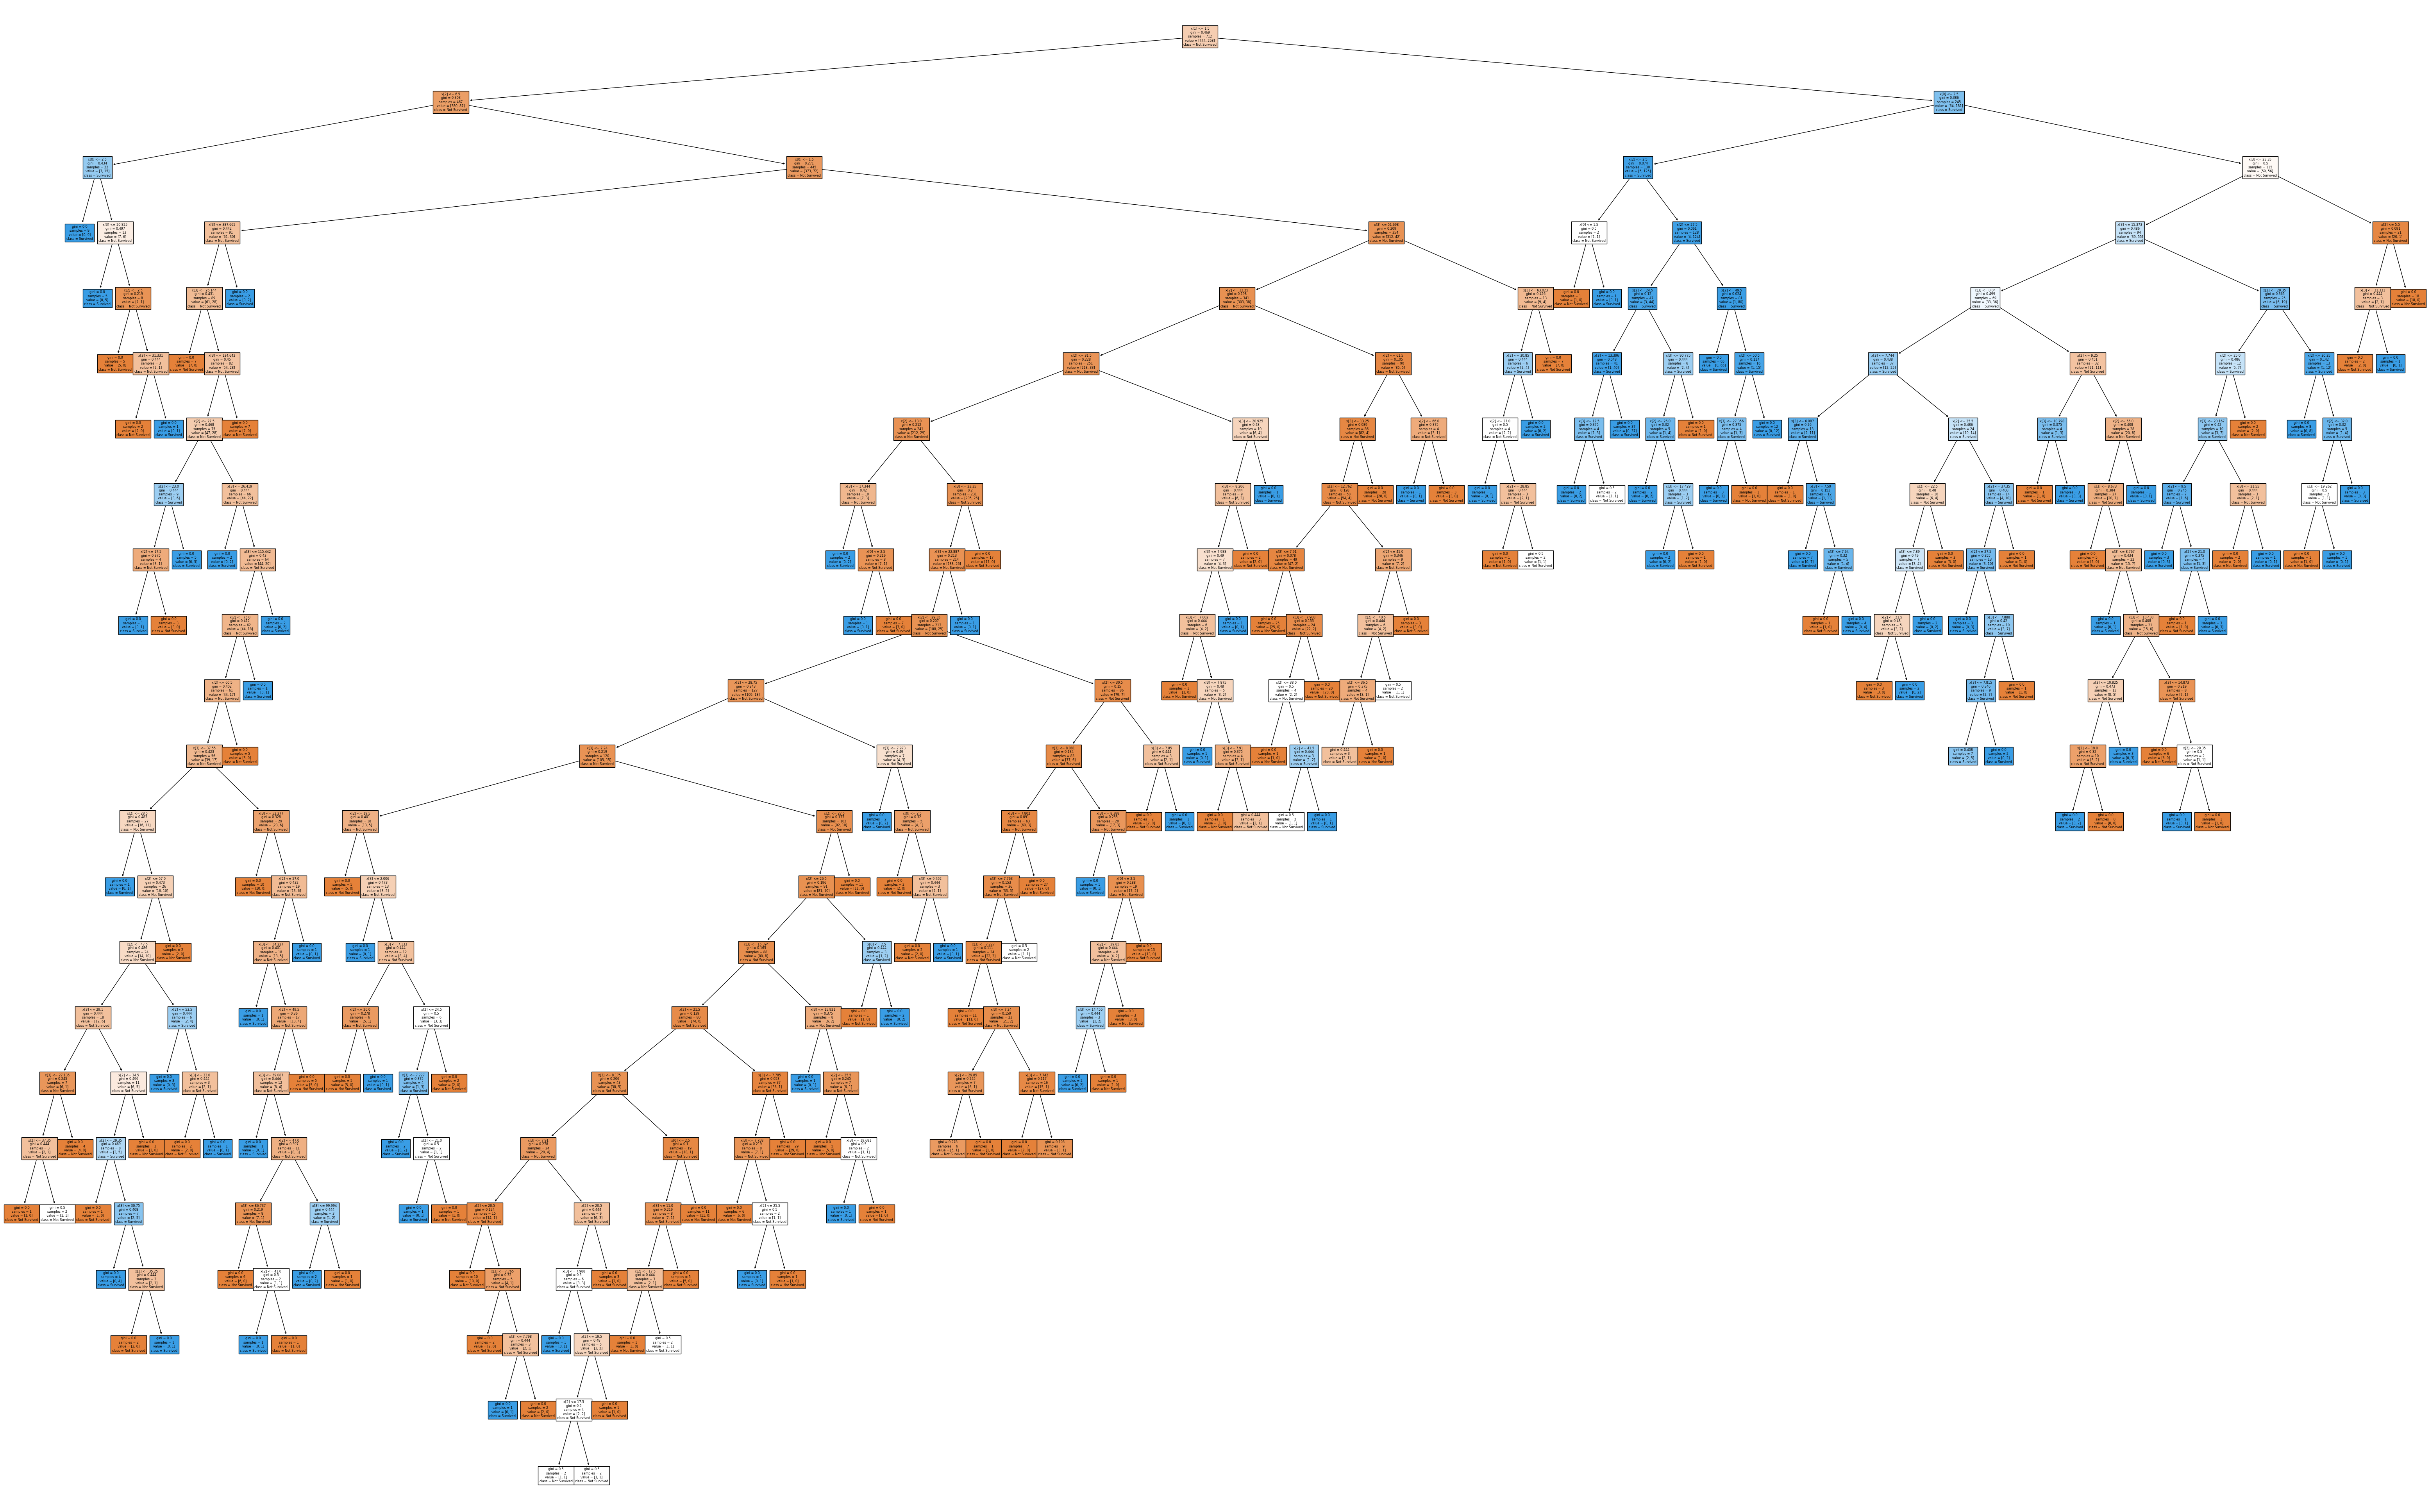

In [35]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50

plot_tree(model,filled=True,class_names=['Not Survived','Survived'])

In [36]:
X_test

,Pclass,Sex,Age,Fare
709,3,1,29.699118,15.2458
439,2,1,31.000000,10.5000
840,3,1,20.000000,7.9250
720,2,2,6.000000,33.0000
39,3,2,14.000000,11.2417
...,...,...,...,...
433,3,1,17.000000,7.1250
773,3,1,29.699118,7.2250
25,3,2,38.000000,31.3875
84,2,2,17.000000,10.5000


In [39]:
model.predict([[2,2,6.00,33.00]])

/Users/manojpoudel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [38]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [41]:
from sklearn.metrics import classification_report

y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.77      0.78       105
           1       0.69      0.72      0.70        74

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

